In [3]:
import numpy as np
import matplotlib.pyplot as plt
save_path = './'

In [146]:
def bisection(f, a, b, steps=50, tol=1e-10, local=True):
    ''''''
    # init
    i = 0
    cn = [a, b]

    if f(a) < 0 and f(b) >=0:
        inds = [0, 1]
    elif f(a) >= 0 and f(b) < 0:
        inds = [1, 0]
    else:
        raise ValueError('Check initial guesses')
        
    # main loop
    while i < steps and np.abs(f(cn[-1])) > tol:
        c = (cn[inds[0]] + cn[inds[1]])/2  # midpoint
        cn.append(c)
        
        negative = (f(c) < 0)        
        if local:
            if negative:
                inds[0] = i+2  # replace negative with c
            else:
                inds[1] = i+2  # replace positive with c
        else:
            if negative:
                cn = [c, cn[1]]
            else:
                cn = [cn[0], c]
            inds = [0, 1]
        i+=1
    if local:
        return np.array(cn)
    else:
        return cn[-1]

[1.         2.         1.5        1.25       1.375      1.4375
 1.40625    1.421875   1.4140625  1.41796875 1.41601562 1.41503906
 1.41455078 1.41430664 1.41418457 1.41424561 1.41421509 1.41419983
 1.41420746 1.41421127 1.41421318 1.41421413 1.41421366 1.41421342
 1.41421354 1.4142136  1.41421357 1.41421355 1.41421356 1.41421356
 1.41421356]


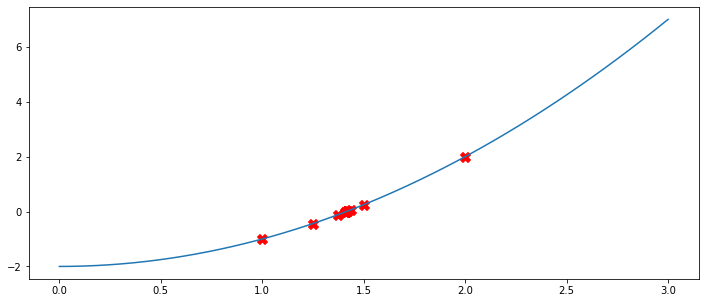

In [180]:
f = lambda x: x**2 - 2
fp = lambda x: 2*x

cn = bisection(f, 1, 2)
print(cn)

x = np.linspace(0, 3, 50)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(x, f(x))
ax.scatter(cn, f(cn), c='r', marker='X', s=100)
plt.show()

In [151]:
def newton(f, fp, x0, steps=50, tol=1e-10, local=True):
    '''Given a function f, its derivative fp and a starting
    guess x0, perform Newton's method for at most 'steps'
    iterations or the truncation error |f(xn)|<tol.
    
    Set the flag local=False to only store the most recent
    iteration.'''
    # init
    i = 0
    xn = [x0]
    
    # main loop
    while i < steps and np.abs(f(xn[-1])) > tol:
        xn.append(xn[-1] - f(xn[-1])/fp(xn[-1]))  # Newton step
        
        if not local:
            xn.pop(0)
        i+=1

    if local:
        return np.array(xn)
    else:
        return xn[-1]

[2.         1.5        1.41666667 1.41421569 1.41421356]


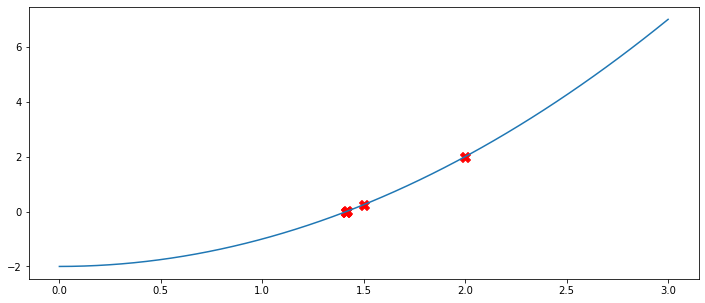

In [177]:
f = lambda x: x**2 - 2
fp = lambda x: 2*x

xn = newton(f, fp, 2)
print(xn)

x = np.linspace(0, 3, 50)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(x, f(x))
ax.scatter(xn, f(xn), c='r', marker='X', s=100)
plt.show()

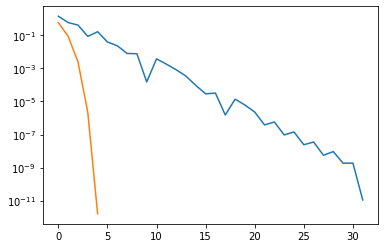

In [178]:
cn = bisection(f, 0, 2)
err = np.abs(cn - np.sqrt(2))
plt.plot(err)
xn = newton(f, fp, 2)
err = xn - np.sqrt(2)
plt.yscale('log')
plt.plot(err)

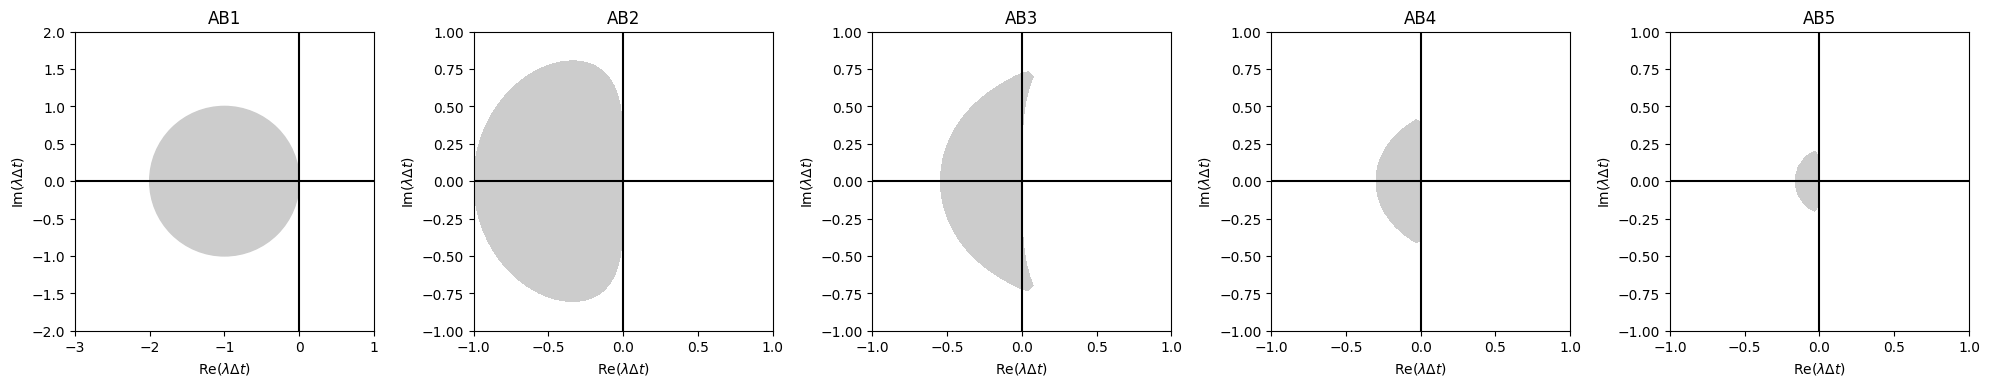

In [4]:
### Adapted from
# https://commons.wikimedia.org/wiki/File:Stability_region_for_BDF1.svg

plotWindow = {'realPart': [-2, 5], 'imagPart': [-3, 3]}

# Returns > 1 if argument is not in region of absolute stability
def AB2_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 3/2*dtLambda,
                      1/2 * dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB3_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 23/12*dtLambda,
                      16/12*dtLambda, -5/12*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB4_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 55/24*dtLambda,
                      59/24*dtLambda, -37/24*dtLambda, 9/24*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))

def AB5_stabilityFunction(dtLambda):
    stabPolyCoeffs = [1, -1 - 1901/720*dtLambda,
                      2774/720*dtLambda, -2616/720*dtLambda,
                      1274/720*dtLambda, -251/720*dtLambda]
    return max(abs(np.roots(stabPolyCoeffs)))



# AB3
x = np.linspace(*plotWindow['realPart'], num=200)
y = np.linspace(*plotWindow['imagPart'], num=100)
[X, Y] = np.meshgrid(x, y)

Z_AB2 = np.zeros(X.shape)
Z_AB3 = np.zeros(X.shape)
Z_AB4 = np.zeros(X.shape)
Z_AB5 = np.zeros(X.shape)


for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        Z_AB2[m, n] = AB2_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB3[m, n] = AB3_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB4[m, n] = AB4_stabilityFunction(X[m, n] + 1j * Y[m, n])
        Z_AB5[m, n] = AB5_stabilityFunction(X[m, n] + 1j * Y[m, n])

fig, axs = plt.subplots(1, 5, figsize=(20, 12))
shading = '0.8'

for ax in axs.reshape(-1):
    ax.set_aspect('equal')
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_xlabel(r'Re($\lambda\Delta t$)')
    ax.set_ylabel(r'Im($\lambda\Delta t$)')

ax = axs[0]
ax.axis([-3, 1, -2, 2])
ax.set_title('AB1')
ax.add_patch(plt.Circle((-1, 0), 1, color=shading))


ax = axs[1]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB2')
ax.contourf(X, Y, Z_AB2, [0, 1], colors=shading)


ax = axs[2]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB3')
ax.contourf(X, Y, Z_AB3, [0, 1], colors=shading)

ax = axs[3]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB4')
ax.contourf(X, Y, Z_AB4, [0, 1], colors=shading)

ax = axs[4]
ax.axis([-1, 1, -1, 1])
ax.set_title('AB5')
ax.contourf(X, Y, Z_AB5, [0, 1], colors=shading)


fig.tight_layout()
plt.savefig(save_path+'ABstab.png', dpi=800, bbox_inches='tight')
plt.show()